# Crop Prediction

In [119]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [120]:
# Load Dataset
df=pd.read_csv(r"C:\Users\SURAJ\Downloads\Crop_recommendation.csv")
df.head(3)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [122]:
# Check for null
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [123]:
#Define Feature and target 
x=df.drop('label', axis=1)
y=df.label

In [124]:
# Encoding label
le=LabelEncoder()
y_enc=le.fit_transform(y)
crop_map=dict(zip(le.classes_, le.transform(le.classes_)))
crop_map

{'apple': np.int64(0),
 'banana': np.int64(1),
 'blackgram': np.int64(2),
 'chickpea': np.int64(3),
 'coconut': np.int64(4),
 'coffee': np.int64(5),
 'cotton': np.int64(6),
 'grapes': np.int64(7),
 'jute': np.int64(8),
 'kidneybeans': np.int64(9),
 'lentil': np.int64(10),
 'maize': np.int64(11),
 'mango': np.int64(12),
 'mothbeans': np.int64(13),
 'mungbean': np.int64(14),
 'muskmelon': np.int64(15),
 'orange': np.int64(16),
 'papaya': np.int64(17),
 'pigeonpeas': np.int64(18),
 'pomegranate': np.int64(19),
 'rice': np.int64(20),
 'watermelon': np.int64(21)}

In [125]:
# Train Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y_enc,test_size=0.2,random_state=42)

In [126]:
# Train model
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [127]:
# Evaluate
pred=model.predict(x_test)
print('Accuracy:- ', accuracy_score(y_test,pred))
print('#'*30)
print(classification_report(y_test,pred))

Accuracy:-  0.9931818181818182
##############################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       

In [128]:
def recommend_crop(n,p,k,temp,humidity,ph,rainfall):
    input_data=np.array([[n,p,k,temp,humidity,ph,rainfall]])
    prediction= model.predict(input_data)
    return le.inverse_transform(prediction)[0]
recommend_crop(90,42,43,25.3,80,6.5,200)

'rice'

# Yield prediction

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [130]:
# Load Dataset
df_yield=pd.read_csv(r"C:\Users\SURAJ\Documents\Year,Crop,Yield (quintalha).csv")
df_yield.head(5)

,Year,Crop,Yield (quintal/ha)
0,2010,wheat,29.8
1,2011,wheat,30.2
2,2012,wheat,30.4
3,2013,wheat,31.1
4,2014,wheat,31.5


In [131]:
# Encoding Crop name
le_yield=LabelEncoder()
df_yield['Crop_enc']=le_yield.fit_transform(df_yield['Crop'])
crop_map=dict(zip(le_yield.classes_,le_yield.transform(le_yield.classes_)))

In [132]:
# Define Feature and target
x_yield=df_yield[['Year','Crop_enc']]
y_yield=df_yield['Yield (quintal/ha)']

In [133]:
# Train Test Split and Model Training
x_train_yield,x_test_yield,y_train_yield,y_test_yield=train_test_split(x_yield,y_yield,test_size=0.2,random_state=42)
lr_model=RandomForestRegressor(random_state=42)
lr_model.fit(x_train_yield,y_train_yield)

RandomForestRegressor(random_state=42)

In [134]:
# Evaluate
y_pred=lr_model.predict(x_test_yield)
print('RMSE:- ', mean_squared_error(y_test_yield,y_pred))
print('R2 Score:- ',r2_score(y_test_yield,y_pred))

RMSE:-  0.28929844444441044
R2 Score:-  0.9990569361942571


In [139]:
# Prediction function
def predict_yield(year,crop_name):
    code=crop_map.get(crop_name)
    if code is None:
        return 'Crop not Found'
    predy=lr_model.predict([[year,code]])
    return round(predy[0],2)
predict_yield(2025,'rice')

np.float64(36.28)

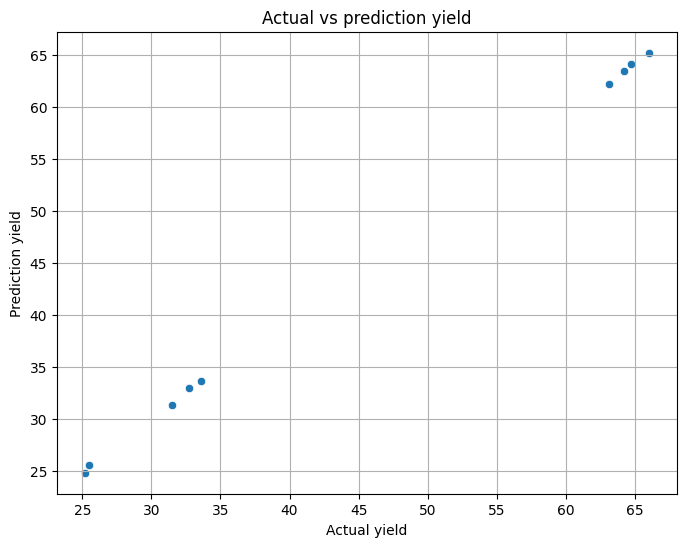

In [136]:
# Visualize prediction
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_yield,y=y_pred)
plt.xlabel('Actual yield')
plt.ylabel('Prediction yield')
plt.title('Actual vs prediction yield')
plt.grid(True)
plt.show()

In [137]:
# Combined Utility
def full_crop_plan(n,p,k,temp,humidity,ph,rainfall,year):
    crop=recommend_crop(n,p,k,temp,humidity,ph,rainfall)
    yield_pred=predict_yield(year,crop)
    return { 'recommended Crop': crop,'Expected Yield (quintal/ha)':yield_pred}
full_crop_plan(70,57,17,25.3,60,6.5,63,2025)

{'recommended Crop': 'maize', 'Expected Yield (quintal/ha)': np.float64(27.73)}